<center>
    
# Univariate Timeseries Forecasting Toturial
   
**Author: Suleman_Zack** <br>
**Date created:** 10/06/2021<br>
    
</center>]
<center><img src='image.jpg' width="600" height="100"></center>



### Problem Description:
This notebook presents a tutorial for basic understanding of time series forecasting and its implementation in Python. The problem is to predict the daily temperature in a particular area at a 10mins interval. The dataset used in this tutorial is a multivariate dataset with 14 features from the Jena Climate dataset recorded by the [Max Planck Institute for Biogeochemistry](https://www.bgc-jena.mpg.de/wetter/). The dataset consists of 14 features such as temperature, pressure, humidity etc, recorded once per 10 minutes. In this univariate forecasting our main focus will be on the Temprerature **T (degC)** variable. Thus, the analysis and forecast will center on the temperature for each 10 minutes.


### Objective 
The main of objective of this notebook is to provide a basic step by step time series tutorial on how to apply the existing methods on real life data. By the end of this tutorial, the reader will;
- be exposed to time series data visualization
- understand terms used in time series analysis like trend, seasonality, sliding window, lags etc
- be able to load, clean and prepare time series data for analysis
- model time series data with naive, AR, MA, and ARIMA models


### Methodology
The notebook focuses on the basic classical time series forecasting techniques like naive, moving average, ARIMA etc.

- Data importation
- Data exploration and visualization
    - Line Plot
    - Histogram
    - Density Plot
    - ACF, PACF 
     
- Data Modelling and forecasting
    - Naive Model
    - Moving average and sliding window
    - AR model
    - ARIMA

### Basic Definitions
* **Time series data:** Is a set of observations collected or recorded sequentially with respect to a specific time interval.
- **Time  Series Analysis:** The analysis and probing to understand historical time series data.
- **Time Series Forecasting:** The use of historical time series data to predict future observations.  

## Setup
The libraries used in this tutorial are
- Pandas: $\implies$ provides a dataframe structure for importing and wrangling data
- numpy: $\implies$ For the handling of arrays and some mathematival functions
- matplotlib: $\implies$  For visualization
- statsmodel: $\implies$ For modelling as well as visualizing the time series data
- sklearn: $\implies$ For evaluation of the predictions or forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
# Model Evaluation
from sklearn.metrics import mean_squared_error as mse


### Data Importtion



A time series is a sequence of observations taken sequentially in time.

In [2]:

df = pd.read_csv('jena_climate_2009_2016.csv',parse_dates=['Date Time'])
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [4]:
df.shape

(420551, 15)

### Univariate Dataset Creation
In this tutorial, we will consider the univariate time series hence we select only one feature for the analysis. The temperature T (degC) is the variable of interest. The dataset has 420551 observations but will slice the firts 1440 observations for the analysis. The 1440 represents the observations for the first 5 days. Thus, we will analyze the temperaturs recorded for first 5 days at an interval of 10 minutes. The slicing isn't for any technical reason but to have a small data to speed the execution of the codes. The reader can choose to use the entire observations.

In [5]:
data=df[['Date Time','T (degC)']][:1440] # 10 days of data obserbations taken in 10 minutes interval
data.rename(columns={'T (degC)':'Temp','Date Time':'Date'},inplace=True)
data.head()

,Date,Temp
0,2009-01-01 00:10:00,-8.02
1,2009-01-01 00:20:00,-8.41
2,2009-01-01 00:30:00,-8.51
3,2009-01-01 00:40:00,-8.31
4,2009-01-01 00:50:00,-8.27


In [6]:
# Summary Statistics
data.describe()

,Temp
count,1440.000000
mean,-8.593639
std,5.685620
min,-23.010000
25%,-12.652500
50%,-7.860000
75%,-3.927500
max,-0.630000


## Data Visualization

To give us a sense of the data we are working with, it is imperative to visualize the data to observe the trends and pattern in the data. The plots used are
- line plot
- histogram
- distribution plot
- lag plot


#### Line Plots

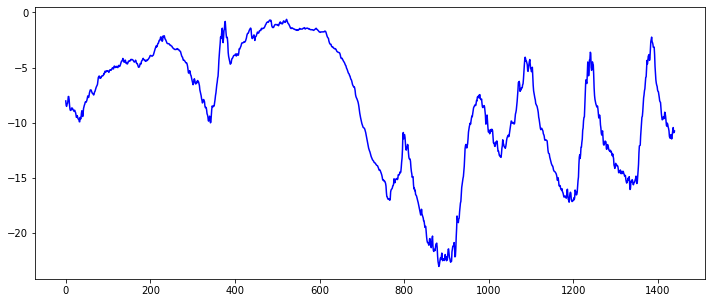

In [7]:
# Continuos line plot
data['Temp'].plot(figsize=(12,5),color={'blue'});

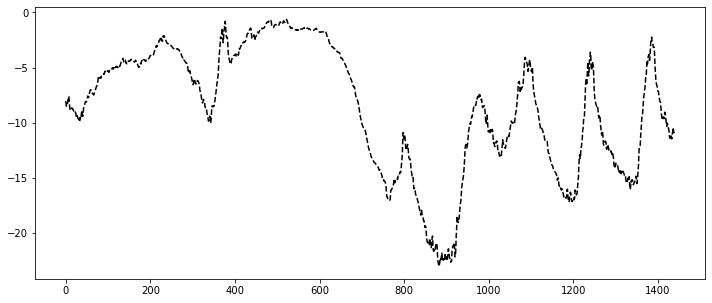

In [8]:
# Line plot with short dashes lines
data['Temp'].plot(figsize=(12,5),style='k--');#,color={'blue'}

#### Histogram


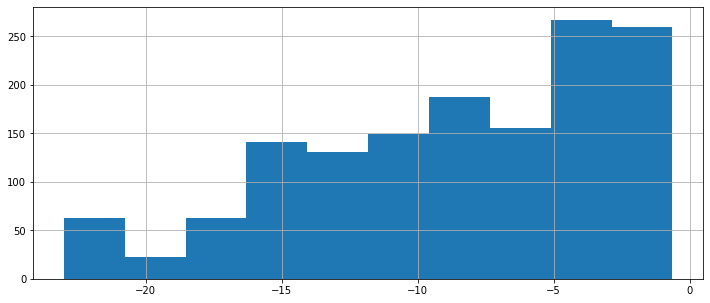

In [9]:

data['Temp'].hist(figsize=(12,5));#,color='orange');

### Distribution Plot
This provides the distribution of the observations in the data. This data is negatively skewed.

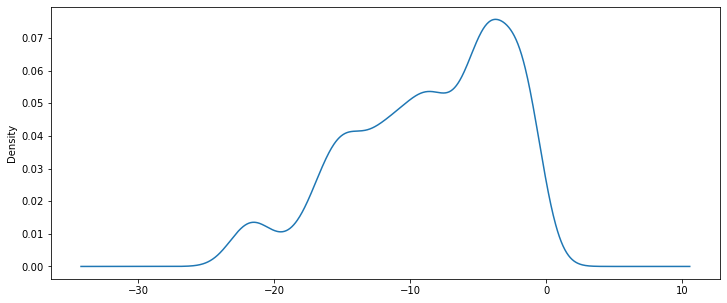

In [10]:

data['Temp'].plot(figsize=(12,5),kind='kde');#,color='orange');

### Lag plot
A lag of a time series observation is the observation prior to the present observation. The number of past observations determines the lag length. or example, 4-lag means the past four observations and n-lage $\implies$ the last n-obsetvations.


The lap plot assigns the observation at time t on the x-axis and the observation at the next time step (t+1) on the
y-axis.
- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests
a negative correlation relationship.
In both of the above, the indication is that, there is a strong correlation between an observation and the past observations.

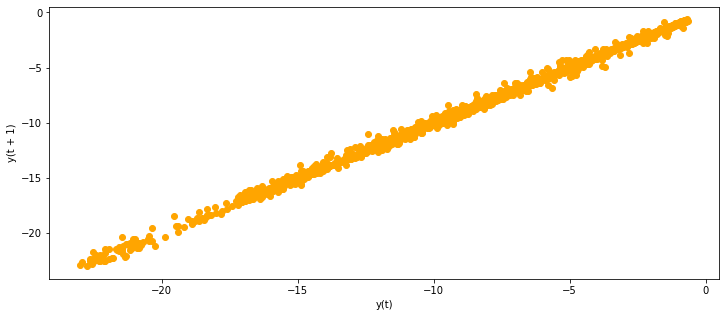

In [11]:

plt.figure(figsize=(12,5))
lag_plot(data['Temp'],c='orange')
plt.show()


### Autocorrelation Plot
The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines
are provided that indicate any correlation values above those lines are statistically significant
(meaningful).

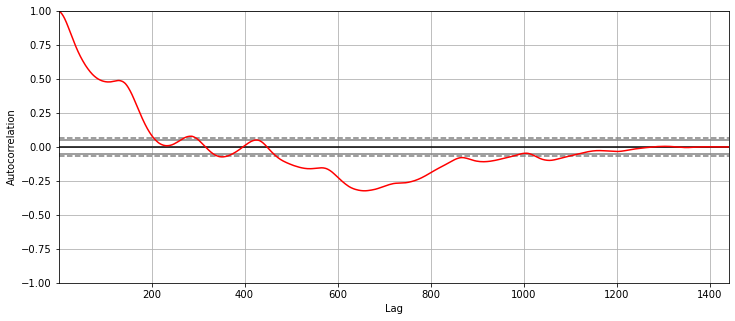

In [12]:

plt.figure(figsize=(12,5))
autocorrelation_plot(data['Temp'],c='red')
plt.show()


# Modelling and Forecasting
From the visualizations, we can conclude that,
- The data shows some form of seasonnality.
- There is a strong autocorrelation


### 1. Naive Forcasting Strategy
A naive forecast involves using the previous observation directly as the forecast without any
change. It is often called the persistence forecast as the prior observation is persisted. This
simple approach can be adjusted slightly for seasonal data. In this case, the observation at the
same time in the previous cycle may be persisted instead.<br> 
Technically, the **Naive forecast** assumes the obserbation at $t=t-1$ or $t+1=t$

1152

In [13]:
# Using the naive method, the prdiction can be obtained as follows
data1=data.copy()
data1['Prediction']=data['Temp'].shift(1)
data1.head()

,Date,Temp,Prediction
0,2009-01-01 00:10:00,-8.02,NaN
1,2009-01-01 00:20:00,-8.41,-8.02
2,2009-01-01 00:30:00,-8.51,-8.41
3,2009-01-01 00:40:00,-8.31,-8.51
4,2009-01-01 00:50:00,-8.27,-8.31


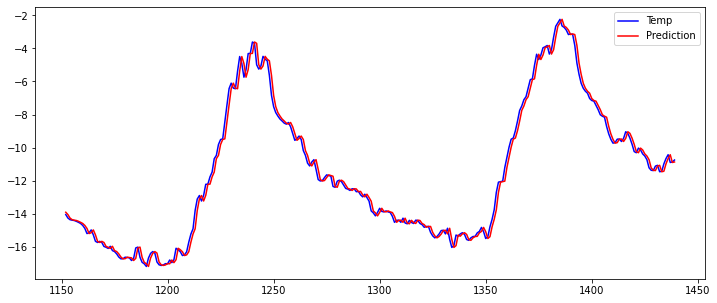

In [43]:
t_size=int(0.8*len(data1))
data1[['Temp','Prediction']][t_size:].plot(figsize=(12,5),color={'blue','red'});



In [44]:
# Naive Model Evaluation
print('MSE :',mse(data1['Temp'][t_size:],data1['Prediction'][t_size:]))

MSE : 0.1428166666666667


### Residual Plot
The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance. A non-Gaussian distribution may suggest an opportunity
for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in
forecasts that may be correct.

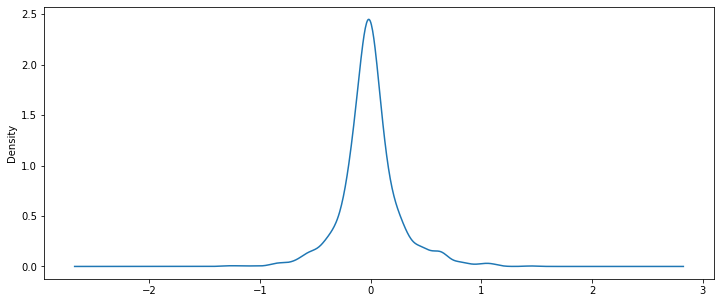

In [16]:

(data1['Temp']-data1['Prediction']).plot(figsize=(12,5),kind='kde');#,color='orange');

### Average Forecast Method
One step above the naive forecast is the strategy of averaging prior values. All prior observations
are collected and averaged, either using the mean or the median, with no other treatment to
the data. In some cases, we may want to shorten the history used in the average calculation
to the last few observations.<br>
In the code below, <br>
* window  $ \implies$ Size or length of the moving window. Thus, the number of observations used for calculating the statistic
* min_periods $\implies$ Minimum number of observations in the window required to have a value otherwise NAN

In [17]:
# Using the 3-past average method, the prdiction can be obtained as follows
data2=data.copy()
data2['Prediction']=data['Temp'].shift().rolling(min_periods=3,window=3).mean()
data2.head()

,Date,Temp,Prediction
0,2009-01-01 00:10:00,-8.02,NaN
1,2009-01-01 00:20:00,-8.41,NaN
2,2009-01-01 00:30:00,-8.51,NaN
3,2009-01-01 00:40:00,-8.31,-8.313333
4,2009-01-01 00:50:00,-8.27,-8.410000


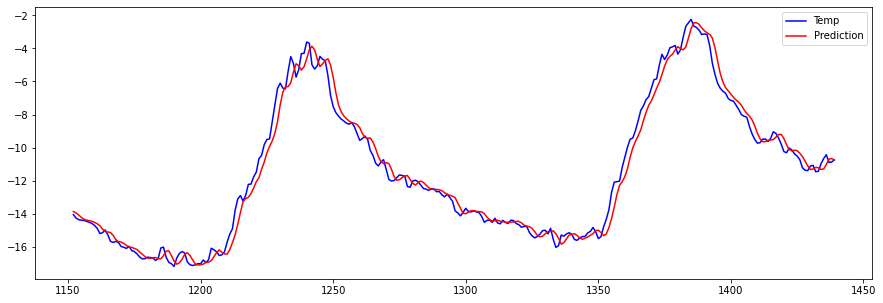

In [45]:
data2[['Temp','Prediction']][t_size:].plot(figsize=(15,5),color={'red','blue'});


### Average Model Evaluation

In [46]:
print('MSE :',mse(data2['Temp'][t_size:],data2['Prediction'][t_size:]))

MSE : 0.3604761574074062


### Residual Plot

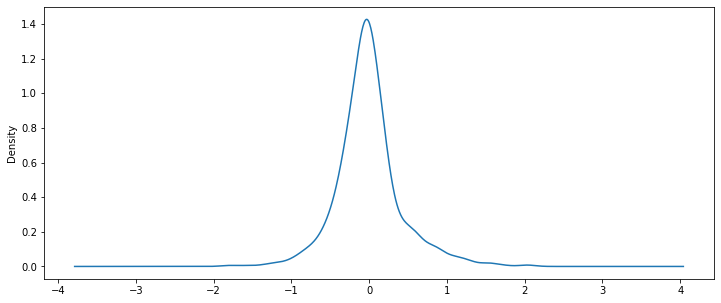

In [35]:
(data2['Temp']-data2['Prediction']).plot(figsize=(12,5),kind='kde');#,color='orange');

## ARIMA Models
The ARIMA model includes the **Autoressive model**, **Integrated Model** and the **Moving Average model**. <br>
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler
AutoRegressive Moving Average or ARMA and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
* **AR: Autoregression.** $\implies$ A model that uses the dependent relationship between an observation
and some number of lagged observations.
* **I: Integrated.** $\implies$ The use of differencing of raw observations (e.g. subtracting an observation
from an observation at the previous time step) in order to make the time series stationary.
* **MA: Moving Average.** $\implies$ A model that uses the dependency between an observation and a
residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used. A problem with ARIMA is that it does not support seasonal data.


## Test for Stationarity
### Augmented Dickey-Fuller test
To give a good prediction of the time series using ARIMA, it is recommended the data is stationary. Stationarity implies the mean and the variance of the observations does not change with time. Thus, a relatively constant mean and variance. There are statistical tests to check for stationarity and one of them is the Augmented Dickey-Fuller test.<br>
In the Dickey–Fuller test;
- $H_{0}$: The data is non-stationary
- $H_{1}$: The data is stationary


**Decision Rule** <br>
If p-value $> \alpha = 0.05$, **Reject** $H_{0}$ else **Reject** $H_{1}$



In [21]:
from statsmodels.tsa.stattools import adfuller
df_=data['Temp']

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("\nReject the null hypothesis: The data is STATIONARY.")
    else:
        print("\nFail to reject the Null Hypotesis: The data is NON-STATIONARY.")

adfuller_test(df_)

ADF Test Statistic : -2.446442409444589
p-value : 0.1290549572042713
#Lags Used : 24
Number of Observations : 1415

Fail to reject the Null Hypotesis: The data is NON-STATIONARY.


### Differencing
One of the methods of making a non-stationary time series data stationary is by differencing. Thus subtracting past 
observations from the current observation.

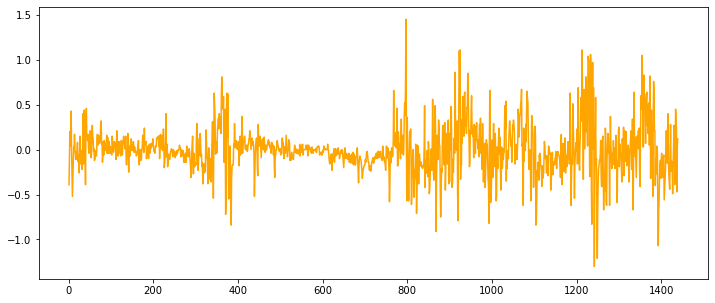

In [22]:
df_arima=data.copy()
df_arima['Diff']=df_arima['Temp']-df_arima['Temp'].shift(1)
df_arima['Diff'].plot(figsize=(12,5),color='orange');

In [23]:
adfuller_test((df_arima['Diff']).dropna())

ADF Test Statistic : -6.992891730363903
p-value : 7.663749898349531e-10
#Lags Used : 24
Number of Observations : 1414

Reject the null hypothesis: The data is STATIONARY.


### ARIMA Parameters estimation
The ARIMA model takes parameters p,d,q where
- p $\implies$ the lag for the autoregression (AR)
- d $\implies$ the length of differencing
- q $\implies$ the lag for the moving average (MA)
To determine the appropraite values for p,d,q, the ACF and PACF plots are employed to estimate q and p respectively.
### Conditions for selecting AR, MA or ARIMA model.

- The model is AR if the ACF trails off after a lag and PACF cuts-off in the  after a lag. This lag is taken as the value for p.
- The model is MA if the PACF trails off after a lag and the ACF cuts-off after the lag. This lag value is taken as the value for q.
- The model is a mix of AR and MA if both the ACF and PACF trail off


Inthe plots below, both the ACF and PACF trails off. Hence, ARIMA(p,d,q) where $p,q \neq 0$ is suitable to be applied

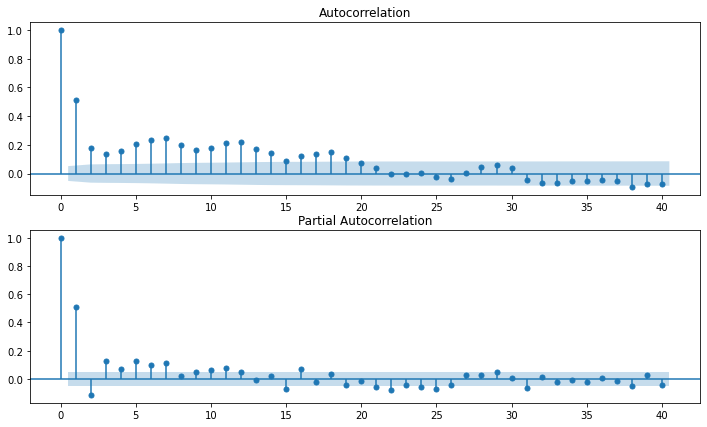

In [24]:
#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_arima['Diff'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_arima['Diff'].iloc[1:],lags=40,ax=ax2)

In [25]:
_model=ARIMA(df_arima['Temp'],order=(3,1,0))
model_arima=_model.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 1440
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 119.895
Date:                Wed, 09 Jun 2021   AIC                           -231.789
Time:                        01:27:20   BIC                           -210.702
Sample:                             0   HQIC                          -223.917
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5838      0.017     34.747      0.000       0.551       0.617
ar.L2         -0.1845      0.019     -9.924      0.000      -0.221      -0.148
ar.L3          0.1247      0.017      7.525      0.000       0.092       0.157
sigma2         0.0495      0.001     45.224      0.000       0.047       0.052
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               841.92
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               3.78   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
df_arima.head()

,Date,Temp,Diff
0,2009-01-01 00:10:00,-8.02,NaN
1,2009-01-01 00:20:00,-8.41,-0.39
2,2009-01-01 00:30:00,-8.51,-0.10
3,2009-01-01 00:40:00,-8.31,0.20
4,2009-01-01 00:50:00,-8.27,0.04


Test MSE: 0.104


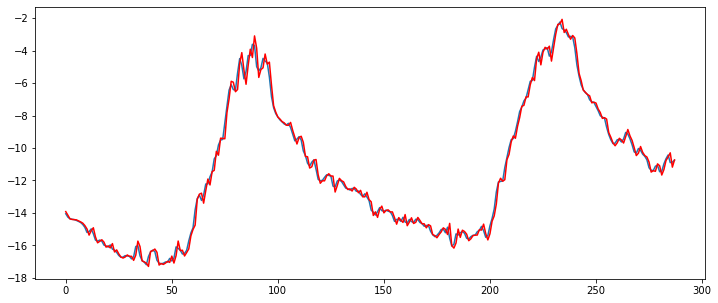

In [27]:
X = df_arima['Temp'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation size+3,
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
     
# evaluate forecasts


# plot forecasts against actual outcomes
plt.figure(figsize=(12,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [40]:
### Model Evaluation
mse_ = (mse(test, predictions))
print('Test MSE: %.3f' % mse_)

Test MSE: 0.104


### Residual Analysis

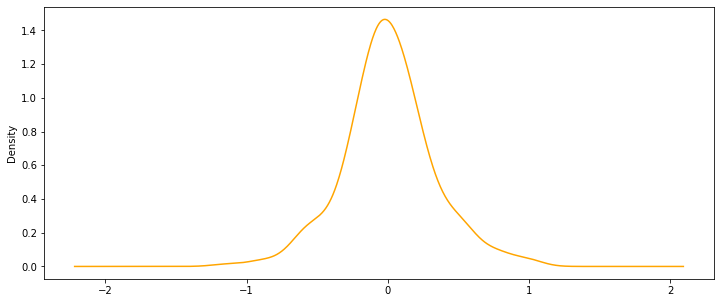

In [39]:
pd.Series(test-predictions).plot(figsize=(12,5),kind='kde',color='orange');

### Grid Search for Arima
The Grid Serach is used to find the combination of p,d,q that gives that provides the best prediction. 
This is achieved by running the model with the different parameter combination and the evaluation metric (mse) computed. 
The combination with the least mse is chosen as the model parameters.

In [ ]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()#disp=0
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse_ = mse_(test, predictions)
    return mse_
                       
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = X#dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse_ = evaluate_arima_model(dataset, order)
                    if mse_ < best_score:
                        best_score, best_cfg = mse_, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse_))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
                       
p_values = [0, 1, 2, 3, 5, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)



# Conclusion

This tutorial covered the basic Time Series Analysis and Forecasting concepts with their implementation in Python.
With respect to the dataset used the ARIMA(3,1,0) is the best among all the three models tested.<br>

**Future**
- Implement a Machine Learning Model on Time Series Data
    - Univariate : Regression, Decision Tree, Classification
    - Multivariate :  Regression, Decision Tree, Classification
- Times Series Forecasting using Deep Learning Models

# References
* Jason Brownlee, <I>Introduction to Time Series with Python</I>, Edition: v1.9, 2020.
* Aileen Nielsen, <I>Practical Time Series Analysis: Prediction with Statistics & Machine Learning</I>, First Edition, 2019

